# Routing using Dijkstra's algorithm

### Graph for testing

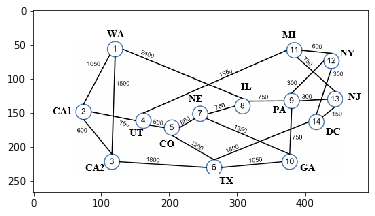

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import math
image = mpimg.imread("graph.png")
plt.imshow(image)
plt.show()

## Dijkstra's algorithm

### Time complexity (min priority queue) :    $ O(|V| + |E|log(V))$

In [2]:
#initialize graph

graph = ["WA", "CA1", "CA2","UT","CO","TX","GA","DC","NE","IL","PA","NJ","NY","MI"]
name_to_vertex = {}
vertex_to_name = {}
dist = {}
prev = {}
# creating vertex dictionary
for i,v in enumerate(graph):
    name_to_vertex[v]=i
    vertex_to_name[i]=v
weights = pd.read_csv("weights.csv").to_numpy()
#min(dist, key=dist.get)

In [3]:
def length(u,v):
    y = name_to_vertex[u]
    x = name_to_vertex[v]
    return weights[x][y]

def min_vertex(Q, dist):
    min_v = next(iter(Q))
    for q in Q:
        if(dist[q]<dist[min_v]):
            min_v = q
    return min_v
        

def neighbors(u):
    n = set()
    for i, col in enumerate(weights[name_to_vertex[u]]):
        if(col != 0 or col == math.inf):
            n.add(vertex_to_name[i])
    return n

def get_shortest_path(prev, source, target):
    current = target
    while(current != source):
        print(current)
        current = prev[current]
    print(current)
    return current, dist[target]

# single dijkstra from source 
def dijkstra_source(graph, source):
    #create vertex set Q
    Q = set()
    
    for v in graph:
        dist[v] = math.inf
        prev[v] = None
        Q.add(v)
    dist[source] = 0
    
    while(Q != set()):
        u = min_vertex(Q,dist)
        Q.remove(u)
        print(u, dist[u])
        
        
        for v in neighbors(u):
            alt = dist[u]+length(u,v)
            if(alt < dist[v]):
                dist[v] = alt
                prev[v] = u
    return dist, prev
    

In [4]:
dijkstra_source(graph, "NY")

NY 0
DC 300
PA 300
NJ 450
MI 600
GA 1050
IL 1050
NE 1800
TX 2100
CO 2400
UT 2550
CA1 3300
WA 3450
CA2 3900


({'WA': 3450,
  'CA1': 3300,
  'CA2': 3900,
  'UT': 2550,
  'CO': 2400,
  'TX': 2100,
  'GA': 1050,
  'DC': 300,
  'NE': 1800,
  'IL': 1050,
  'PA': 300,
  'NJ': 450,
  'NY': 0,
  'MI': 600},
 {'WA': 'IL',
  'CA1': 'UT',
  'CA2': 'TX',
  'UT': 'MI',
  'CO': 'NE',
  'TX': 'DC',
  'GA': 'PA',
  'DC': 'NY',
  'NE': 'IL',
  'IL': 'PA',
  'PA': 'NY',
  'NJ': 'DC',
  'NY': None,
  'MI': 'NY'})

In [5]:
get_shortest_path(prev,'NY','CA1')

CA1
UT
MI
NY


('NY', 3300)